In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-20.96972096119373, 4.106078456831938),
 (-14.123472942266332, 8.948649302341636),
 (-25.869348504100003, -12.550421697623818),
 (-22.50400129385028, 37.25274689465715),
 (-13.596822964906622, 134.5646936113668),
 (-87.23792059694092, -32.427176242220014),
 (-2.0556967568847995, 90.91171831737734),
 (-55.70681386975432, -33.40102430672283),
 (19.08549192809437, -20.406135495904493),
 (29.13128912535265, 44.913346064895165),
 (24.95828036641109, 81.48540881702462),
 (35.73548542353946, 127.39813203750987),
 (-16.300555163266907, -51.370078916307506),
 (51.28737539551116, 143.4258127276076),
 (80.50133977324441, 75.06658403342135),
 (-32.790861413960066, -175.97501475334053),
 (0.28380560141992817, 23.786335920794585),
 (83.25283815023025, -135.35868219682902),
 (-6.133700214065442, -155.5281793130683),
 (-6.5037550615461015, 4.474469393491063),
 (82.93550318227665, -107.84630432665676),
 (-74.21309062923213, 31.282901084575855),
 (69.39120095335565, -63.782283553270844),
 (27.66149173

In [6]:
# import citypy module
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | meulaboh
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | santa maria
Processing Record 9 of Set 1 | doha
Processing Record 10 of Set 1 | sirmaur
Processing Record 11 of Set 1 | seoul
Processing Record 12 of Set 1 | ipora
Processing Record 13 of Set 1 | katangli
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | yangambi
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | gamba
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | pangnirtung
Processing Record 23 of Set 

Processing Record 37 of Set 4 | igrim
Processing Record 38 of Set 4 | balykshi
Processing Record 39 of Set 4 | kuche
City not found. Skipping...
Processing Record 40 of Set 4 | rincon
Processing Record 41 of Set 4 | cape town
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | haines junction
Processing Record 44 of Set 4 | castro alves
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | mayo
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | carambei
Processing Record 49 of Set 4 | stephenville
Processing Record 50 of Set 4 | constitucion
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | brokopondo
Processing Record 3 of Set 5 | ballina
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | aketi
Processing Record 7 of Set 5 | abu samrah
Processing Record 8 of Set 5 | tabiauea
City not found

Processing Record 28 of Set 8 | baykit
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | hailar
Processing Record 31 of Set 8 | carnarvon
Processing Record 32 of Set 8 | shiyan
Processing Record 33 of Set 8 | safaqis
City not found. Skipping...
Processing Record 34 of Set 8 | bargal
City not found. Skipping...
Processing Record 35 of Set 8 | santo angelo
Processing Record 36 of Set 8 | elat
Processing Record 37 of Set 8 | ranong
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | torbay
Processing Record 40 of Set 8 | clarksburg
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 43 of Set 8 | boli
Processing Record 44 of Set 8 | general roca
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | nguruka
Processing Record 47 of Set 8 | mpika
Processing Record 48 of Set 8 | madaoua
Processing Record 49 of Set 8 | kishpek
Processing Record 50 of Set 8

Processing Record 12 of Set 12 | dicabisagan
Processing Record 13 of Set 12 | olafsvik
Processing Record 14 of Set 12 | ulkan
Processing Record 15 of Set 12 | yunhe
Processing Record 16 of Set 12 | naberera
Processing Record 17 of Set 12 | adrar
Processing Record 18 of Set 12 | nemuro
Processing Record 19 of Set 12 | causapscal
Processing Record 20 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 21 of Set 12 | puerto cabezas
Processing Record 22 of Set 12 | pringsewu
Processing Record 23 of Set 12 | labuhan
Processing Record 24 of Set 12 | bay roberts
Processing Record 25 of Set 12 | basco
Processing Record 26 of Set 12 | novopokrovka
Processing Record 27 of Set 12 | samarai
Processing Record 28 of Set 12 | ambulu
Processing Record 29 of Set 12 | moree
Processing Record 30 of Set 12 | villacarrillo
Processing Record 31 of Set 12 | saltpond
Processing Record 32 of Set 12 | litovko
Processing Record 33 of Set 12 | pyaozerskiy
Processing Record 34 of Set 12 | saint-leu

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namibe,-15.1961,12.1522,71.13,88,21,8.59,AO,2021-06-03 18:36:00
1,Jamestown,42.0970,-79.2353,67.06,86,90,4.00,US,2021-06-03 18:33:14
2,Inhambane,-23.8650,35.3833,67.98,68,0,13.80,MZ,2021-06-03 18:32:31
3,Ushuaia,-54.8000,-68.3000,35.22,86,0,5.75,AR,2021-06-03 18:36:01
4,Meulaboh,4.1363,96.1285,77.18,91,100,3.83,ID,2021-06-03 18:36:02
5,Chuy,-33.6971,-53.4616,59.61,48,14,7.61,UY,2021-06-03 18:31:12
6,Santa Maria,-29.6842,-53.8069,74.50,41,0,4.79,BR,2021-06-03 18:36:02
7,Doha,25.2867,51.5333,93.51,49,0,9.22,QA,2021-06-03 18:36:02
8,Sirmaur,24.8500,81.3833,91.44,35,61,8.08,IN,2021-06-03 18:36:03
9,Seoul,37.5683,126.9778,58.44,94,0,3.36,KR,2021-06-03 18:33:24


In [10]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ['City','Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,2021-06-03 18:36:00,-15.1961,12.1522,71.13,88,21,8.59
1,Jamestown,US,2021-06-03 18:33:14,42.0970,-79.2353,67.06,86,90,4.00
2,Inhambane,MZ,2021-06-03 18:32:31,-23.8650,35.3833,67.98,68,0,13.80
3,Ushuaia,AR,2021-06-03 18:36:01,-54.8000,-68.3000,35.22,86,0,5.75
4,Meulaboh,ID,2021-06-03 18:36:02,4.1363,96.1285,77.18,91,100,3.83


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

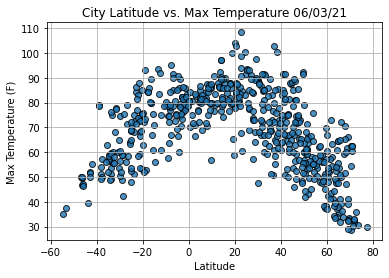

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

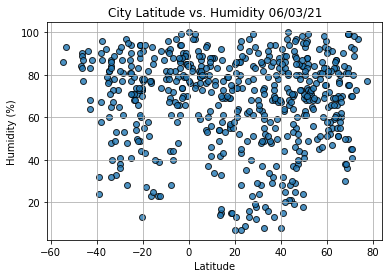

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

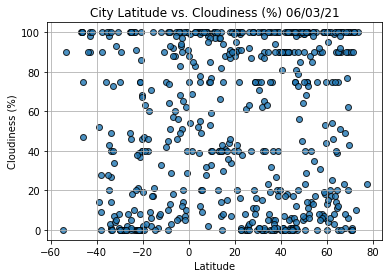

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

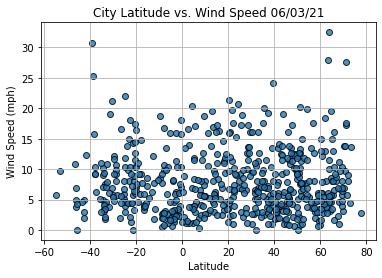

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Present all the information at index 13 of the city_data_df DataFrame.
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2021-06-03 18:34:56
Lat                         -21.2
Lng                        -175.2
Max Temp                    68.16
Humidity                       94
Cloudiness                     75
Wind Speed                    0.0
Name: 13, dtype: object

In [19]:
# Get all Northern Hemisphere latitudes (latitudes greater than or equal to 0)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2021-06-03 18:33:14,42.0970,-79.2353,67.06,86,90,4.00
4,Meulaboh,ID,2021-06-03 18:36:02,4.1363,96.1285,77.18,91,100,3.83
7,Doha,QA,2021-06-03 18:36:02,25.2867,51.5333,93.51,49,0,9.22
8,Sirmaur,IN,2021-06-03 18:36:03,24.8500,81.3833,91.44,35,61,8.08
9,Seoul,KR,2021-06-03 18:33:24,37.5683,126.9778,58.44,94,0,3.36


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

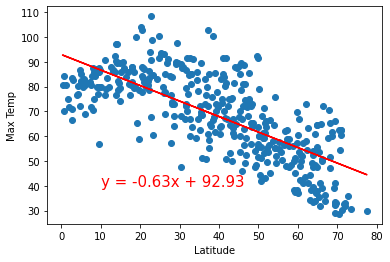

r_value is -0.728569637918594.


In [35]:
# Linear regression on the Northern Hemisphere (Lat vs. Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

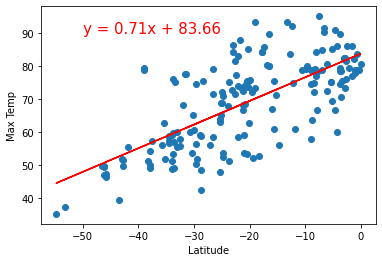

r_value is 0.7099709689181429.


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

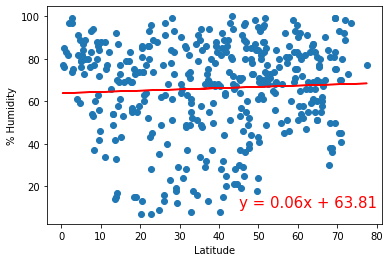

r_value is 0.053356726500018825.


In [39]:
# Linear regression on the Northern Hemisphere (Lat vs. Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

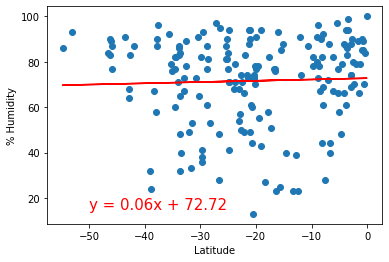

r_value is 0.0377516387559914.


In [43]:
# Linear regression on the Southern Hemisphere (Lat vs. Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

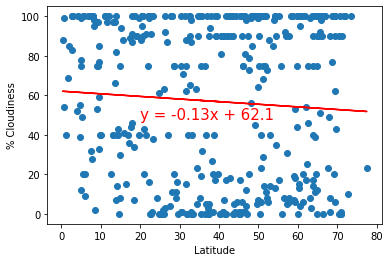

r_value is -0.0664742625881833.


In [46]:
# Linear regression on the Northern Hemisphere (Lat vs. Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,48))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

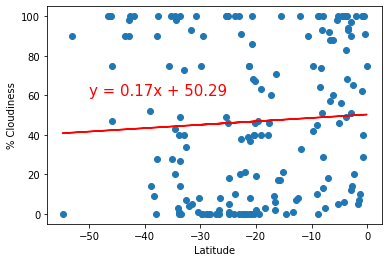

r_value is 0.05846904616308012.


In [48]:
# Linear regression on the Southern Hemisphere (Lat vs. Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

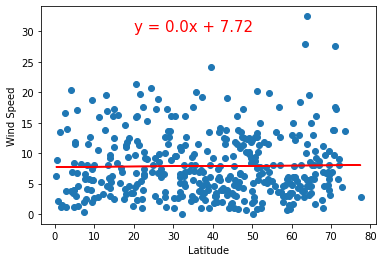

r_value is 0.014139489082251763.


In [50]:
# Linear regression on the Northern Hemisphere (Lat vs. Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,30))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")

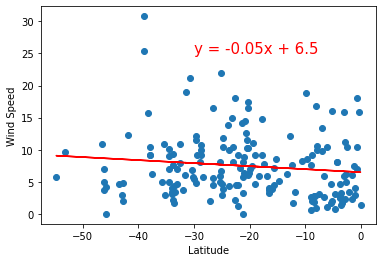

r_value is -0.1220926409427278.


In [52]:
# Linear regression on the Southern Hemisphere (Lat vs. Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))

# Get r-value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"r_value is {r_value}.")